In [62]:
period = 30
open_balances = [None for _ in range(period)]
new_cases = [None for _ in range(period)]
no_CSA = 10
no_CSE = 10
no_Temps = 10
no_TL = 10
initial_open_balance = 1000
open_balances[0] = initial_open_balance

In [68]:
import random

for i in range(len(new_cases)):
    new_cases[i] = random.randint(500,1000)


In [69]:
#average case closure rate per day for each agents to be estimated based on historical data
case_closure_rate_CSA = 20
case_closure_rate_CSE = 15
case_closure_rate_Temps = 15
case_closure_rate_TL = 5

In [70]:
total_case_closed_perday = (case_closure_rate_CSA*no_CSA) + (case_closure_rate_CSE*no_CSE) + (case_closure_rate_Temps*no_Temps) + (case_closure_rate_TL*no_TL)

In [71]:
for i in range(period - 1):
    d = i + 1
    open_balances[d] = open_balances[i] + new_cases[i] - total_case_closed_perday


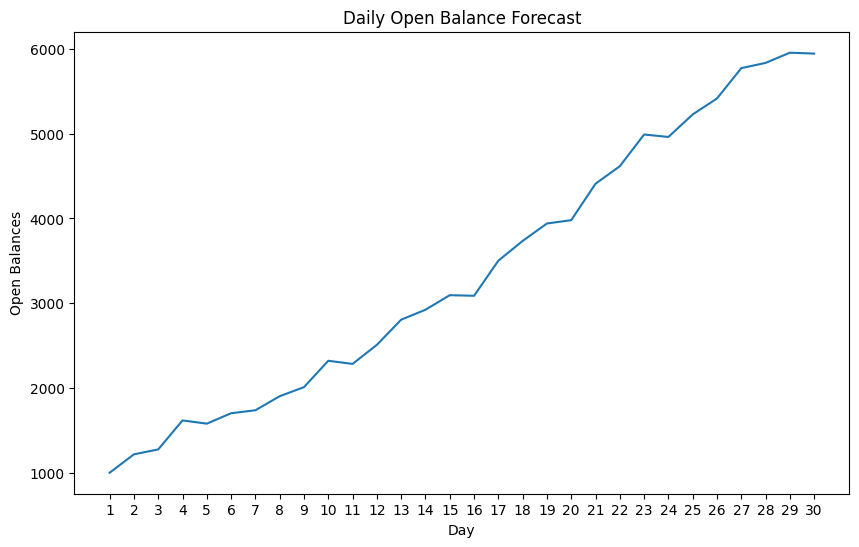

In [72]:
import matplotlib.pyplot as plt

# Sample data
days = list(range(1, period + 1))

# Set figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plotting the graph
plt.plot(days, open_balances)

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Open Balances')
plt.title('Daily Open Balance Forecast')

plt.xticks(days)

# Displaying the graph
plt.show()


In [132]:
case_closure_rate_CSA_target = 0
case_closure_rate_CSE_target = 0
case_closure_rate_Temps_target = 0
case_closure_rate_TL_target = 0
total_case_closed_perday_target = (case_closure_rate_CSA_target*no_CSA) + (case_closure_rate_CSE_target*no_CSE) + (case_closure_rate_Temps_target*no_Temps)

In [10]:
open_balances = [1000,2000,3000,4000,5000]

In [133]:
import itertools

# Define ranges for case_closure_rate targets
ranges = {
    'CSA': (15, 25),
    'CSE': (10, 35),
    'Temps': (10, 25),
}

# Define function to calculate total_case_closed_perday_target
def calculate_total_case_closed(targets, counts):
    total = 0
    for target, count in zip(targets, counts):
        total += target * count
    return total

# Define function to check if open_balances differ by at most 500
def within_threshold(open_balances, threshold=500):
    for i in range(len(open_balances) - 1):
        if abs(open_balances[i + 1] - open_balances[i]) > threshold:
            return False
    return True


In [134]:
# Create a list of value ranges for each target
value_ranges = [range(start, end + 1) for start, end in ranges.values()]

# Generate all combinations of values
combinations = list(itertools.product(*value_ranges))

# Print the combinations
for combination in combinations:
    print(combination)


(15, 10, 10)
(15, 10, 11)
(15, 10, 12)
(15, 10, 13)
(15, 10, 14)
(15, 10, 15)
(15, 10, 16)
(15, 10, 17)
(15, 10, 18)
(15, 10, 19)
(15, 10, 20)
(15, 10, 21)
(15, 10, 22)
(15, 10, 23)
(15, 10, 24)
(15, 10, 25)
(15, 11, 10)
(15, 11, 11)
(15, 11, 12)
(15, 11, 13)
(15, 11, 14)
(15, 11, 15)
(15, 11, 16)
(15, 11, 17)
(15, 11, 18)
(15, 11, 19)
(15, 11, 20)
(15, 11, 21)
(15, 11, 22)
(15, 11, 23)
(15, 11, 24)
(15, 11, 25)
(15, 12, 10)
(15, 12, 11)
(15, 12, 12)
(15, 12, 13)
(15, 12, 14)
(15, 12, 15)
(15, 12, 16)
(15, 12, 17)
(15, 12, 18)
(15, 12, 19)
(15, 12, 20)
(15, 12, 21)
(15, 12, 22)
(15, 12, 23)
(15, 12, 24)
(15, 12, 25)
(15, 13, 10)
(15, 13, 11)
(15, 13, 12)
(15, 13, 13)
(15, 13, 14)
(15, 13, 15)
(15, 13, 16)
(15, 13, 17)
(15, 13, 18)
(15, 13, 19)
(15, 13, 20)
(15, 13, 21)
(15, 13, 22)
(15, 13, 23)
(15, 13, 24)
(15, 13, 25)
(15, 14, 10)
(15, 14, 11)
(15, 14, 12)
(15, 14, 13)
(15, 14, 14)
(15, 14, 15)
(15, 14, 16)
(15, 14, 17)
(15, 14, 18)
(15, 14, 19)
(15, 14, 20)
(15, 14, 21)
(15, 14, 22)

In [135]:
valid_combinations = {}

# Iterate through combinations and find the best one
for combination in combinations:
    new_open_balances = open_balances.copy()
    total_case_closed_perday_target = calculate_total_case_closed(combination, [no_CSA, no_CSE, no_Temps, no_TL])
    for i in range(period - 1):
        new_open_balances[i + 1] = new_open_balances[i] + new_cases[i] - total_case_closed_perday_target

    if within_threshold(new_open_balances):
        valid_combinations[combination] = new_open_balances


In [136]:
top10_dict = {}
for combination, open_balance in valid_combinations.items():
    # Check if the final value in the list is more than 1000
    if open_balance[-1] > 1000:
        top10_dict[combination] = open_balance

# Sort the filtered dictionary based on the final value in the list
sorted_data = sorted(top10_dict.items(), key=lambda x: x[1][-1])

# Take only the first 10 entries with the smallest last values
top_10_data = sorted_data[:10]

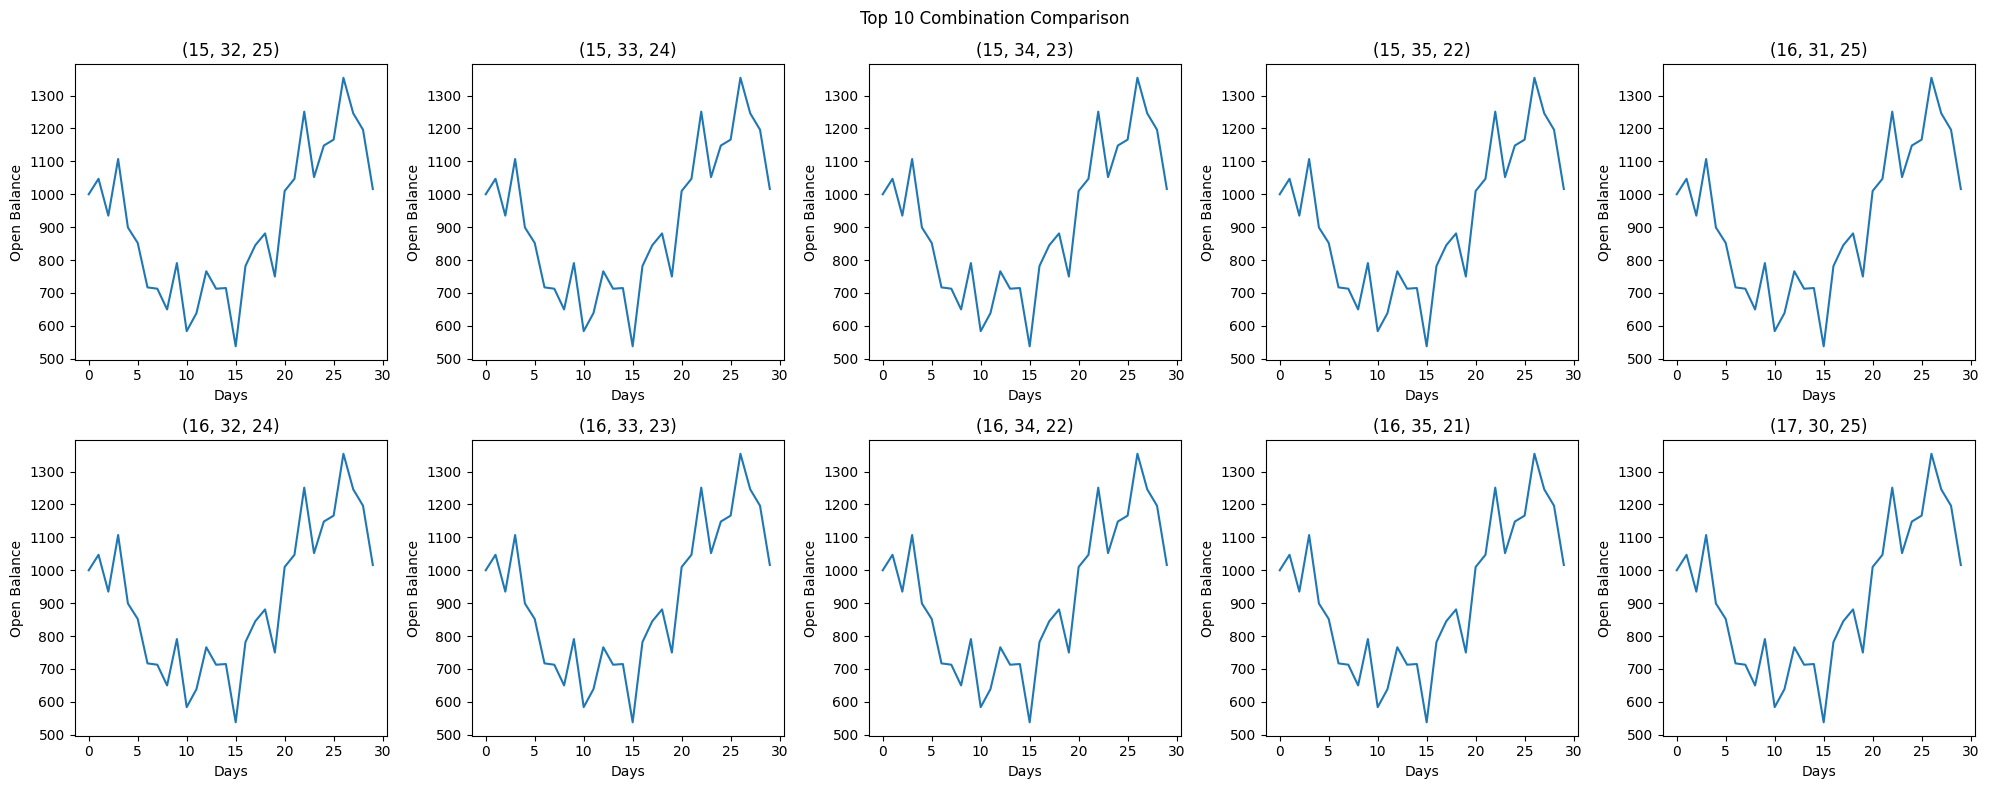

In [137]:
# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Adjust the size as needed
fig.suptitle('Top 10 Combination Comparison')

# Plot each entry
for i, (key, values) in enumerate(top_10_data):
    row = i // 5
    col = i % 5
    axs[row, col].plot(values)
    axs[row, col].set_title(key)
    axs[row, col].set_xlabel('Days')
    axs[row, col].set_ylabel('Open Balance')

# Adjust layout
plt.tight_layout()
plt.show()